In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Dataset Description

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

# EDA - Data cleaning, Data visualization

In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

From the above analysis, we can see that there are no null-values in the data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

### Data cleaning

1. From the dataset features, we shall remove the ID column as it is not necessary for the prediction. 
2. From the dataset description, the **Education** feature has 3 main categories namely (1=graduate school, 2=university, 3=high school). The unique values shows that there are 7 categories of education. So, we shall put categories (0, 5, 6) into number 4 indicating **Other**.
3. The feature **PAY_0** will be replaced with **PAY_1** to make inline with **PAY_AMT1** and **BILL_AMT1**.
4. The Marriage feature has (1,2 and 3) but we can see 0 as fourth categoty. We shall replace 0 to 3 and make it as **others**.
5. The target variable **default.payment.next.month** is replaced with name **DEFAULT** for ease of process.  

In [7]:
# Lets copy the original dataset, so any changes made will not affect the original data.
data = df.copy()

In [8]:
def data_cleaning(data):
  data = data.drop('ID', axis = 1)
  fill = (data.EDUCATION == 0) | (data.EDUCATION == 5) | (data.EDUCATION == 6)
  data.loc[fill, 'EDUCATION'] = 4
  data = data.rename(columns = {'default.payment.next.month': 'DEFAULT', 'PAY_0': 'PAY_1'})
  data['MARRIAGE'].replace({0:3}, inplace=True)
  return data

In [9]:
data = data_cleaning(data)

In [10]:
data['DEFAULT'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: DEFAULT, dtype: float64

The target data looks unbalanced as it 22% default and 77% not default. Lets move for visualization

### Data Visualization

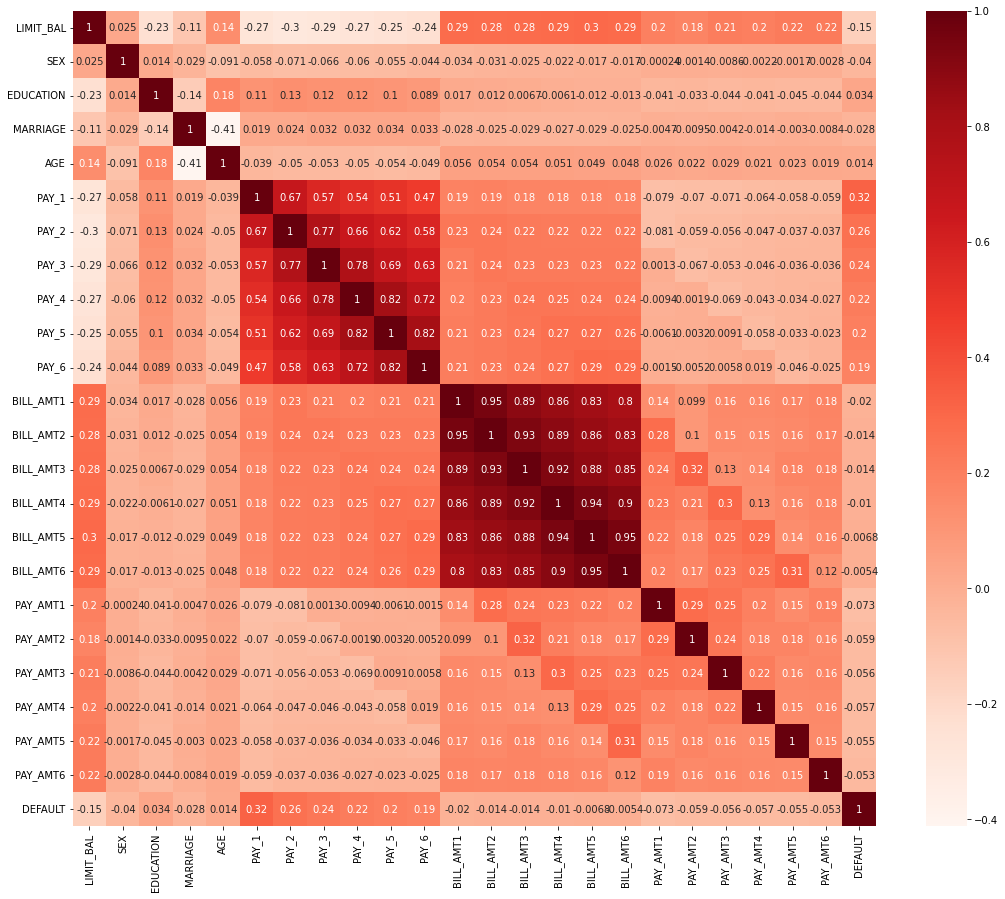

In [11]:
# Heat map

corr = data.corr()

plt.figure(figsize=(18,15))
sns.heatmap(corr, annot=True, cmap='Reds')
plt.show()

Inference from heatmap

* The correlation of Bill Amounts have a strong correlation between each other. This makes sense because the given client will have similar bill amount in each month.
* The correlation of Repayment status is also highly correlated. The Pay represents ordinal variable that measures how late they are in there payment as seen in the description of Pay (-1 = -1=pay duly, 1=payment delay for one month, 2=payment delay for two months and so on). This high correlation might make sense since it states that if they are late for Pay_1, they might be late for other payments too.


Comparison with Target (Default variable)

* We can see that there is no strong correlation with the target variable from other features.
* So, it can represent that if we get a good model performance it cannot be from a single feature. It should be from the combination of many features.
* Positive correlation with default means longer period of payment delay and higher default. Negative correlation means higher credit limit indicating lower default.


In [12]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


##### Plotting **SEX** with **DEFAULT**

In [13]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

We see more women than man. We shal visualize that in stacked bar plot below.

In [14]:
gender_plot = data.groupby(['SEX', 'DEFAULT']).size()

In [15]:
gender_plot = data.groupby(['SEX', 'DEFAULT']).size().unstack(1) # Unstack creates the groupby into dataframe

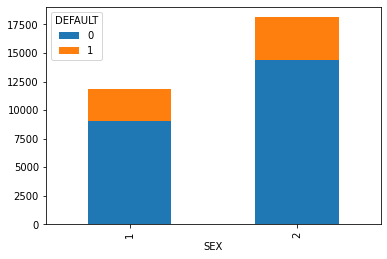

In [16]:
gender_plot.plot(kind = 'bar', stacked=True)  # Stacked gives us the plot one top of another. While bar chart gives side by side plot.
plt.show()

##### Plotting **EDUCATION** with **DEFAULT**

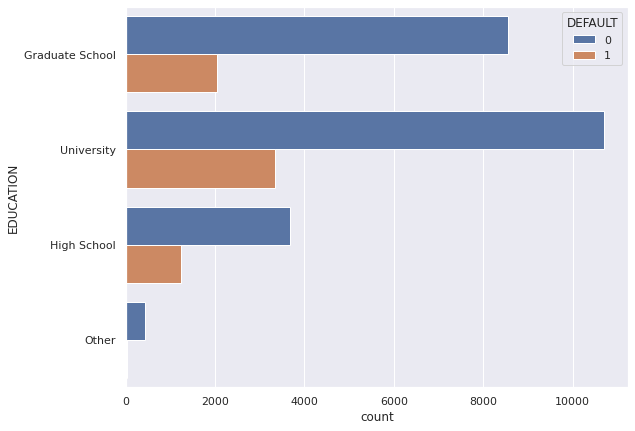

In [17]:
sns.set(rc={'figure.figsize':(9,7)})
edu_plot = sns.countplot(y='EDUCATION', hue='DEFAULT', data=data)
edu_plot.set_yticklabels(['Graduate School','University','High School','Other'])
plt.show()

Education vs default in percentage

We shall calculate the percentage in two steps.
1. Seperate the education levels with and without default in a dataframe and make another column as total. Combine all dataframes into one dataframe.
2. The percentage is calculated by dividing the count by total * 100.

In [18]:
def0 = data.groupby(data['EDUCATION'][data['DEFAULT']==0]).size().reset_index(name = 'NOT DEFAULT') # size gives values, reset index sets to dataframe with column name not default.
def1 = data.groupby(data['EDUCATION'][data['DEFAULT']==1]).size().reset_index(name = 'DEFAULT')
total = data.groupby('EDUCATION').size().reset_index(name='TOTAL')

In [19]:
edu = def0.join(def1['DEFAULT']).join(total['TOTAL'])
edu['EDUCATION'] = ['Graduate School', 'University', 'High School', 'Other']
edu['NOT DEFAULT'] = round((edu['NOT DEFAULT']/edu['TOTAL'])* 100,2)
edu['DEFAULT'] = round((edu['DEFAULT']/edu['TOTAL'])*100,2)
edu.drop('TOTAL', axis=1, inplace=True)
edu

,EDUCATION,NOT DEFAULT,DEFAULT
0,Graduate School,80.77,19.23
1,University,76.27,23.73
2,High School,74.84,25.16
3,Other,92.95,7.05


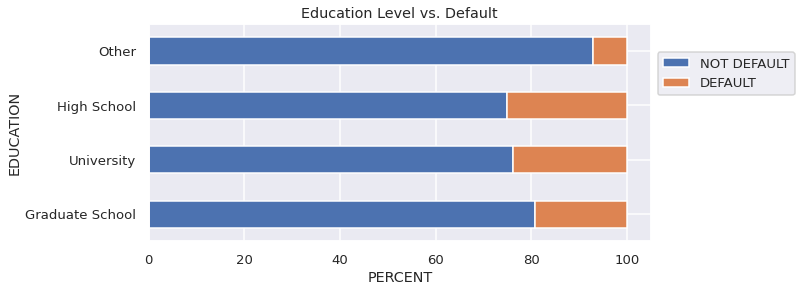

In [20]:
sns.set(rc={'figure.figsize':(9,4)})
sns.set_context("talk", font_scale=0.8)

ax = edu.plot(x='EDUCATION', kind='barh', stacked=True, title='Education Level vs. Default')
ax.set_xlabel('PERCENT')
ax.get_legend().set_bbox_to_anchor((1, 0.9))
plt.show()

Replayment plots

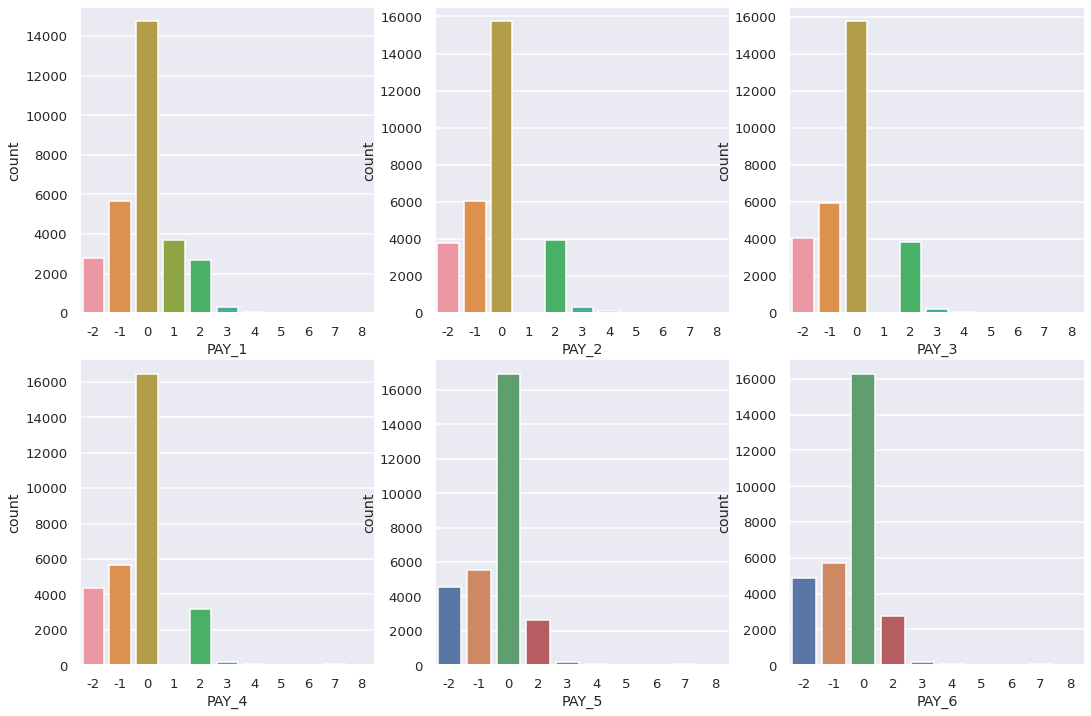

In [21]:
repayment = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

fig, ax = plt.subplots(2,3, figsize = (15,10))
fig.tight_layout()

for cols, subplots in zip(repayment, ax.flatten()): #Flatten collapses into single dimension
  sns.countplot(data[cols], ax=subplots)

1. As per the description of Repayment status, the standand values are:
(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above).

2. But from the above graph, we can see that value -2 and 0 does not make any sense. 

3. Replace -1, -2 to 0 as **Pay duly**. Rest will be from 1-9 and so on.


In [22]:
for cols in repayment:
  data[cols].replace({-1:0, -2:0}, inplace=True)

In [23]:
data['PAY_1'].value_counts()

0    23182
1     3688
2     2667
3      322
4       76
5       26
8       19
6       11
7        9
Name: PAY_1, dtype: int64

Now we shall plot the same graph for replaced data.

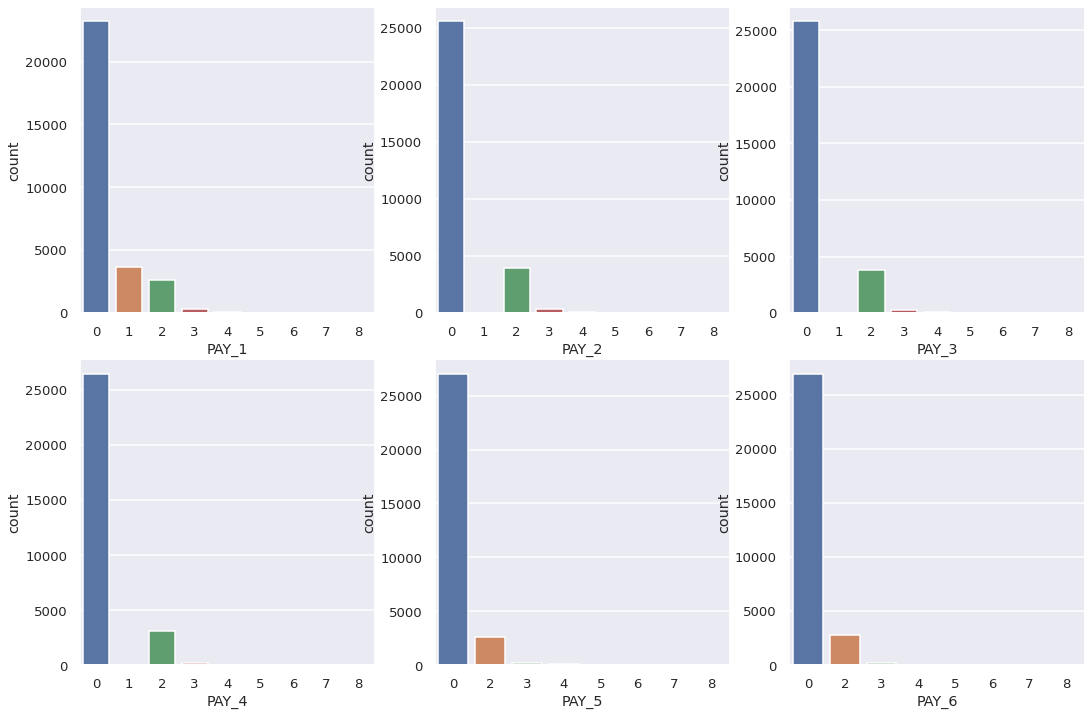

In [24]:
fig, ax = plt.subplots(2,3, figsize = (15,10))
fig.tight_layout()

for cols, subplots in zip(repayment, ax.flatten()): #Flatten collapses into single dimension
  sns.countplot(data[cols], ax=subplots)

From the above graph, we can observe that:

1. Most of the replayment were made on time (duly).
2. A max delay of two months were found for all the months (from April to September or Pay_6 to Pay_1).

##### Amount of Credit given

In [25]:
data['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

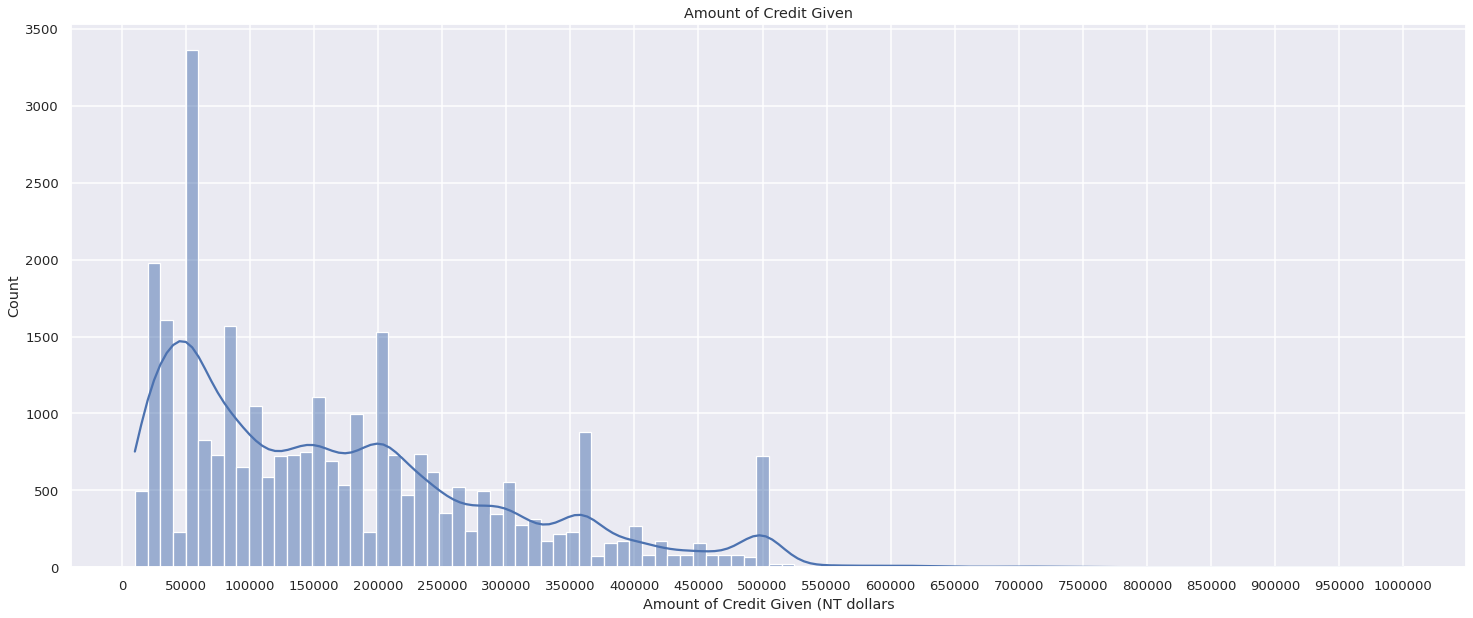

In [26]:
plt.figure(figsize = (25, 10))
sns.histplot(x = data['LIMIT_BAL'], kde = True, bins = 100) # kde - Kernel density estimation
plt.xlabel('Amount of Credit Given (NT dollars')
plt.ticklabel_format(axis='x', style='plain',useOffset=None)
plt.locator_params(axis="x", nbins=30)
plt.title('Amount of Credit Given')
plt.show()

From the above histogram plot, we can see that most loans/credits were around 50000 NT dollars.

#### Plots from Age demographic vs default

In [27]:
data['AGE'].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

In [28]:
range = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
bins = [20, 30, 40, 50, 60, 70, 80]
data['AGE_BIN'] = pd.cut(x = data.AGE, labels=range, bins=bins, right=True)
age_count = data.AGE_BIN.value_counts()
age_count

21-30    11013
31-40    10713
41-50     6005
51-60     1997
61-70      257
71-80       15
Name: AGE_BIN, dtype: int64

In [29]:
age_0 = data.AGE_BIN[data['DEFAULT'] == 0].value_counts()
age_1 = data.AGE_BIN[data['DEFAULT'] == 1].value_counts()

In [30]:
age_0

21-30    8542
31-40    8524
41-50    4606
51-60    1493
61-70     189
71-80      10
Name: AGE_BIN, dtype: int64

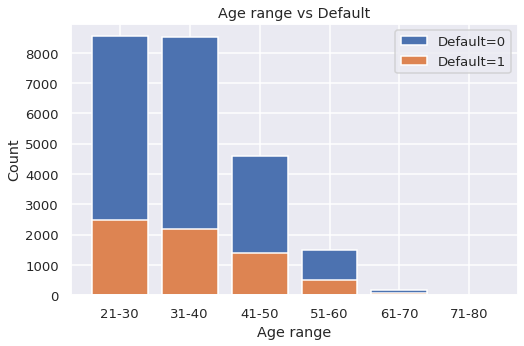

In [31]:
plt.subplots(figsize=(8, 5))
plt.bar(age_0.index, age_0.values, label = '0')
plt.bar(age_1.index, age_1.values, label = '1')
plt.xlabel('Age range')
plt.ylabel('Count')
plt.title('Age range vs Default')
plt.legend(['Default=0', 'Default=1'])
plt.show()

From the above graph, we can infer that with increasing age group, the number of clients that will default the payment next month is decreasing.

# Modeling

Before modeling the dataset and evaluating the result, lets understand the features first.

1. We can see that Limit_Bal is numerical feature and do not need to be coded.
2. The feature **SEX** is a binary feature, it dosen't matter if we do not code it. It acts like a switch between each value and the model understands it.
3. The main concern is on the feature **EDUCATION** and **MARRIAGE**. These are nominal features (although can be considered as ordinal as they have ordered data, but containes others in both). We need to OneHotEncode these features so that the model does not think the value 4 is greather than 3 and so on.
4. The features of Pay_1 to 6 is ordinal and have clear description and do not need coding.
5. Rest features are good to go.

We shall work with scaling in below codes.

#### OneHotEncoding

In [32]:
pd.get_dummies(data['EDUCATION'], prefix='EDU')

,EDU_1,EDU_2,EDU_3,EDU_4
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
29995,0,0,1,0
29996,0,0,1,0
29997,0,1,0,0
29998,0,0,1,0


In [33]:
def onehotencode(df, column_dict):
  for cols, prefix in column_dict.items():
    dummies = pd.get_dummies(data[cols], prefix = prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(cols, axis=1)
  return df

In [34]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,AGE_BIN
0,20000.0,2,2,1,24,2,2,0,0,0,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,21-30
1,120000.0,2,2,2,26,0,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,21-30
2,90000.0,2,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,31-40
3,50000.0,2,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,31-40
4,50000.0,1,2,1,57,0,0,0,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,51-60


In [35]:
data = onehotencode(data, 
             {
                 'EDUCATION':'EDU',
                  'MARRIAGE':'MAR'
             })

In [36]:
data.head()

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT6,DEFAULT,AGE_BIN,EDU_1,EDU_2,EDU_3,EDU_4,MAR_1,MAR_2,MAR_3
0,20000.0,2,24,2,2,0,0,0,0,3913.0,...,0.0,1,21-30,0,1,0,0,1,0,0
1,120000.0,2,26,0,2,0,0,0,2,2682.0,...,2000.0,1,21-30,0,1,0,0,0,1,0
2,90000.0,2,34,0,0,0,0,0,0,29239.0,...,5000.0,0,31-40,0,1,0,0,0,1,0
3,50000.0,2,37,0,0,0,0,0,0,46990.0,...,1000.0,0,31-40,0,1,0,0,1,0,0
4,50000.0,1,57,0,0,0,0,0,0,8617.0,...,679.0,0,51-60,0,1,0,0,1,0,0


#### Split data into Dependent and Independent variables

In [37]:
# Split X and y from the dataset
X = data.drop(['DEFAULT', 'AGE_BIN'], axis=1).copy()
y = data['DEFAULT'].copy()

#### Standard Scaler

* The features in the dataset need to be in the same range for the prediction of model. Else, the model prediction will not be accurate.
* Standard Scaler is necessary for models like Logistic Regression, KNN and Neural networks. It is not necessary for models like Decision tree, random forest since it is purely based on decision.

In [38]:
X.describe()

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDU_1,EDU_2,EDU_3,EDU_4,MAR_1,MAR_2,MAR_3
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,35.485500,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567,51223.330900,...,4826.076867,4799.387633,5215.502567,0.352833,0.467667,0.163900,0.015600,0.455300,0.532133,0.012567
std,129747.661567,0.489129,9.217904,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438,73635.860576,...,15666.159744,15278.305679,17777.465775,0.477859,0.498962,0.370191,0.123924,0.498006,0.498975,0.111396
min,10000.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-165580.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3558.750000,...,296.000000,252.500000,117.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,22381.500000,...,1500.000000,1500.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,67091.000000,...,4013.250000,4031.500000,4000.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1000000.000000,2.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,964511.000000,...,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* The Pay_1to6 features have scale in the range of 0 to 8. But other features like Limit_Bal and Bill_AMT have scale in huge range. 
* StandardScaler standardizes the features such that the mean is 0 with standard deviation of 1.

In [39]:
scaler = StandardScaler()
X_scale = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [40]:
X_scale.head()

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,EDU_1,EDU_2,EDU_3,EDU_4,MAR_1,MAR_2,MAR_3
0,-1.136720,0.810161,-1.246020,2.160496,2.095469,-0.384614,-0.33999,-0.308621,-0.316688,-0.642501,...,-0.308063,-0.314136,-0.293382,-0.738375,1.0669,-0.442752,-0.125886,1.093780,-1.066471,-0.112812
1,-0.365981,0.810161,-1.029047,-0.469071,2.095469,-0.384614,-0.33999,-0.308621,2.478850,-0.659219,...,-0.244230,-0.314136,-0.180878,-0.738375,1.0669,-0.442752,-0.125886,-0.914261,0.937672,-0.112812
2,-0.597202,0.810161,-0.161156,-0.469071,-0.399186,-0.384614,-0.33999,-0.308621,-0.316688,-0.298560,...,-0.244230,-0.248683,-0.012122,-0.738375,1.0669,-0.442752,-0.125886,-0.914261,0.937672,-0.112812
3,-0.905498,0.810161,0.164303,-0.469071,-0.399186,-0.384614,-0.33999,-0.308621,-0.316688,-0.057491,...,-0.237846,-0.244166,-0.237130,-0.738375,1.0669,-0.442752,-0.125886,1.093780,-1.066471,-0.112812
4,-0.905498,-1.234323,2.334029,-0.469071,-0.399186,-0.384614,-0.33999,-0.308621,-0.316688,-0.578618,...,0.266434,-0.269039,-0.255187,-0.738375,1.0669,-0.442752,-0.125886,1.093780,-1.066471,-0.112812


#### Train test split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y) 
X_train_scale, X_test_scale, y_train, y_test = train_test_split(X_scale, y, test_size = 0.25, random_state = 42, stratify = y)

#### Logistic Regression

Lets see why standardization is required in logistic regression by evaluating accuracy of predicting for the model with and without scaling.

In [65]:
def log_reg(X_train, y_train, X_test, y_test):
  model_lr = LogisticRegression()
  model_lr.fit(X_train, y_train)
  ypred = model_lr.predict(X_test)
  accuracy_score = metrics.accuracy_score(y_test, ypred)
  report = classification_report(y_test, ypred)
  cm = confusion_matrix(y_test, ypred)
  return accuracy_score, report, cm, model_lr

In [66]:
# Logistic regression without standardization
accuracy_score, report, cm_noscale, model_lr = log_reg(X_train, y_train, X_test, y_test)
accuracy_score_scaled, report_scaled, cm_scaled, model_lr = log_reg(X_train_scale, y_train, X_test_scale, y_test)

In [67]:
print('Accuracy before scaling:',accuracy_score)
print('Accuracy after scaling:',accuracy_score_scaled)

Accuracy before scaling: 0.7788
Accuracy after scaling: 0.8164


Accuracy is not a good way to consider the metrics since the dataset is not balanced, we shall compare it with confusion matrix although accuracy is better after scaling.

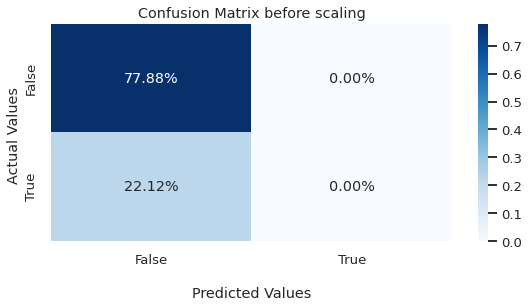

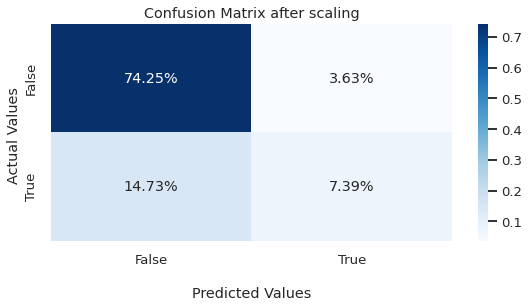

In [68]:
def confusion_plot(cm, title):
  ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
  ax.set_xlabel('\nPredicted Values')
  ax.set_title(title)
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

confusion_plot(cm_noscale, 'Confusion Matrix before scaling')
confusion_plot(cm_scaled, 'Confusion Matrix after scaling')

Observation from Logistric Regression.

1. Although the accuracy is at 78%, the TP (True positive) and FP (False positive) for a model without scaling shows zero which is wrong. 
2. The model with scaling gives a proper result in terms of confusion matrix with TP being 7.39% and FP being 74.25%. The accuracy is at 81%.

#### DecisionTree Classifier

In [50]:
# Setup the parameters for the decision tree.

param = {"max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9],
         "max_features":[1, 2, 3, 4, 5, 6, 7, 8, 9],
         "min_samples_leaf":[1, 2, 3, 4, 5, 6, 7, 8, 9],
         "criterion":['gini', 'entropy']}

# Instansiate Decision Tree
tree = DecisionTreeClassifier()

# Instansiate Randomised Search cv
tree_cv = RandomizedSearchCV(tree, param_distributions = param, cv=5, random_state = 0)

tree_cv.fit(X_train, y_train)

print('Best Decision Tree parameters : {}'.format(tree_cv.best_params_))

Best Decision Tree parameters : {'min_samples_leaf': 2, 'max_features': 9, 'max_depth': 7, 'criterion': 'gini'}


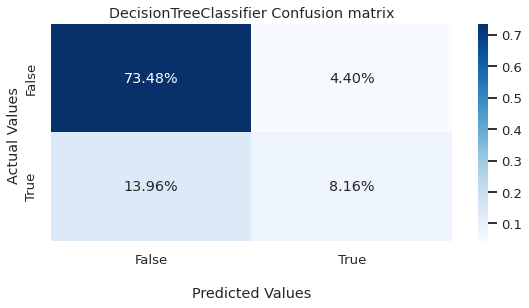


Accuracy: 0.8164

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5841
           1       0.65      0.37      0.47      1659

    accuracy                           0.82      7500
   macro avg       0.75      0.66      0.68      7500
weighted avg       0.80      0.82      0.80      7500



In [63]:
Tree = DecisionTreeClassifier(criterion ='gini', max_depth = 7, max_features = 9, min_samples_leaf = 2)
Tree.fit(X_train, y_train)
ypred = Tree.predict(X_test)

cm = confusion_matrix(y_test, ypred)
confusion_plot(cm, 'DecisionTreeClassifier Confusion matrix')
print()
print('Accuracy:', metrics.accuracy_score(y_test, ypred))
print()
print(classification_report(y_test, ypred))

#### RandomForest Classifier

In [61]:
# Setup the parameters for the random forest.

param = {"n_estimators": [50, 100, 150, 200, 250, 300],
         "max_features":[1, 2, 3, 4, 5, 6, 7, 8, 9],
         "max_depth":[1, 2, 3, 4, 5, 6, 7, 8, 9],
         "criterion":['gini', 'entropy']}

# Instansiate Decision Tree
rf = RandomForestClassifier()

# Instansiate Randomised Search cv
rf_cv = RandomizedSearchCV(rf, param_distributions = param, cv=5, random_state = 0, n_jobs = -1)

rf_cv.fit(X_train, y_train)

print('Best Random Forest parameters : {}'.format(rf_cv.best_params_))


Best Random Forest parameters : {'n_estimators': 150, 'max_features': 5, 'max_depth': 9, 'criterion': 'gini'}


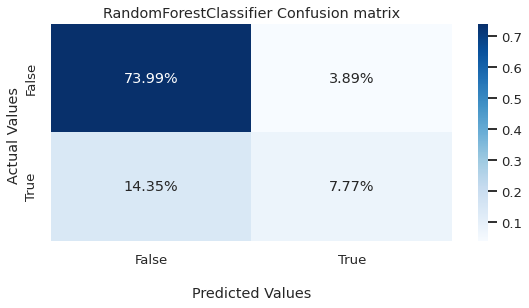


Accuracy: 0.8176

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5841
           1       0.67      0.35      0.46      1659

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.68      7500
weighted avg       0.80      0.82      0.80      7500



In [64]:
RF = RandomForestClassifier(n_estimators = 150, max_features = 5, max_depth = 9, criterion = 'gini', random_state = 0)

RF.fit(X_train, y_train)
ypred = RF.predict(X_test)

cm = confusion_matrix(y_test, ypred)
confusion_plot(cm, 'RandomForestClassifier Confusion matrix')
print()
print('Accuracy:', metrics.accuracy_score(y_test, ypred))
print()
print(classification_report(y_test, ypred))

#### Metrics comparison

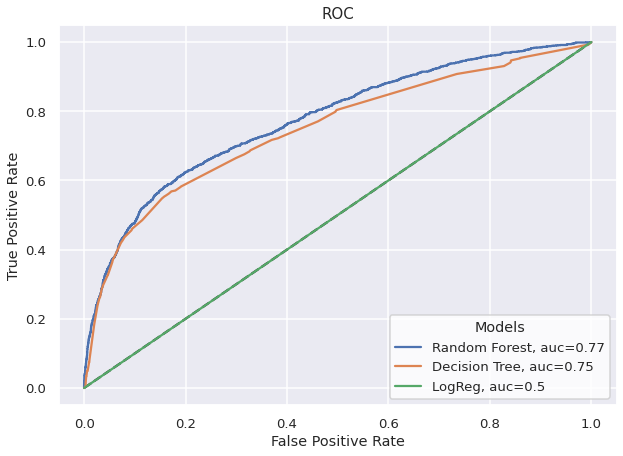

In [75]:
y_pred_proba_RF = RF.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba_RF)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba_RF)

y_pred_proba_DT = Tree.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba_DT)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba_DT)

y_pred_proba_LR = model_lr.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba_LR)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba_LR)

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Random Forest, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Decision Tree, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="LogReg, auc="+str(round(auc3,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.show()